In [3]:
%%html

<!-- Just run this cell to provide style to the notebook-->
<!-- This is a code to add style to the notebook, it is based on a .css on GitHub http://bit.ly/1Bf5Hft -->

<style>

html {
  font-size: 62.5% !important; }
body {
  font-size: 1.5em !important; /* currently ems cause chrome bug misinterpreting rems on body element */
  line-height: 1.6 !important;
  font-weight: 400 !important;
  font-family: "Raleway", "HelveticaNeue", "Helvetica Neue", Helvetica, Arial, sans-serif !important;
  color: #222 !important; }

div{ border-radius: 0px !important;  }
div.CodeMirror-sizer{ background: rgb(244, 244, 248) !important; }
div.input_area{ background: rgb(244, 244, 248) !important; }

div.out_prompt_overlay:hover{ background: rgb(244, 244, 248) !important; }
div.input_prompt:hover{ background: rgb(244, 244, 248) !important; }

h1, h2, h3, h4, h5, h6 {
  color: #333 !important;
  margin-top: 0 !important;
  margin-bottom: 2rem !important;
  font-weight: 300 !important;
    text-decoration: underline;
}
h1 { font-size: 4.0rem !important; line-height: 1.2 !important;  letter-spacing: -.1rem !important;}
h2 { font-size: 3.6rem !important; line-height: 1.25 !important; letter-spacing: -.1rem !important; }
h3 { font-size: 3.0rem !important; line-height: 1.3 !important;  letter-spacing: -.1rem !important; }
h4 { font-size: 2.4rem !important; line-height: 1.35 !important; letter-spacing: -.08rem !important; }
h5 { font-size: 1.8rem !important; line-height: 1.5 !important;  letter-spacing: -.05rem !important; }
h6 { font-size: 1.5rem !important; line-height: 1.6 !important;  letter-spacing: 0 !important; }
    
@media (min-width: 550px) {
  h1 { font-size: 5.0rem !important; }
  h2 { font-size: 4.2rem !important; }
  h3 { font-size: 3.6rem !important; }
  h4 { font-size: 3.0rem !important; }
  h5 { font-size: 2.4rem !important; }
  h6 { font-size: 1.5rem !important; }
}

p {
    margin-top: 0 !important;
    margin-bottom: 1rem !important;
    text-align: justify;
    text-justify: inter-word;
    line-height: 1.5 !important;
    font-size: 1.2em !important;
    font-family: "Raleway", "HelveticaNeue", "Helvetica Neue", Helvetica, Arial, sans-serif !important;
}
  
a {
  color: #1EAEDB !important; }
a:hover {
  color: #0FA0CE !important; }
  
code {
  padding: .2rem .5rem !important;
  margin: 0 .2rem !important;
  font-size: 90% !important;
  white-space: nowrap !important;
  background: #F1F1F1 !important;
  border: 1px solid #E1E1E1 !important;
  border-radius: 4px !important; }
pre > code {
  display: block !important;
  padding: 1rem 1.5rem !important;
  white-space: pre !important; }
  
button{ border-radius: 0px !important; }
.navbar-inner{ background-image: none !important;  }
select, textarea{ border-radius: 0px !important; }
    
#Top_Header {
    background-size: contain;
    background-repeat: no-repeat;
    background-position: left, right;
}

.output {
    display: flex;
    align-items: center;
    text-align: center;
}
    
</style>
    
<script> 
$( document ).ready(function () {
    $("div#notebook-container").children().first().hide();
});
</script>

In [2]:
%%javascript
//Execute this code to show the styling of the document
$("div#notebook-container").children().first().show();

<IPython.core.display.Javascript object>


<div id="Top_Header">
    <center>
        <h1>Alzheimer Disease Identification</h1>
        <h3>Deep Learning: Transfer Learning</h3>
        <h6>Daniel Coll, TFM 2019</h6>
    </center>
</div>

<div id="Introduction">
    <h2>Introduction</h2>
    <p>This notebook proposes an approach to classify Structural Magnetic Resonance Imaging (MRI) for Alzheimer Disease identification using <i>Convolutional Neural Networks</i> and <i> Transfer Learning</i>.</p>
    <p><i> Transfer Learning</i> is an excellence approach for problems where there isn't a large amount of data. Using pre-trained models helps us increase our accuracy, since these models are trained on datasets with millions of images. Adding our own fully connected layers to adapt these models to this particular problem is the final step for this procedure. </p>
</div>

<h2> Importing </h2>

In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt
import pickle
import sklearn as skl
import itertools
from keras import regularizers
from PIL import Image
from sklearn.metrics import confusion_matrix
from PIL import Image
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers     
from keras.applications.inception_v3 import preprocess_input

<h1> Auxiliar Functions </h1>

<p> The following cell includes some useful functions.  </p>

<h1>Path and Labels </h1>

<p> Labels are stored in the list named "classes" and are ordered according to the structure in the dataset folder where the images are stored. </p>
<p>The dataset root paths for the training, validation and test sets are stored in four different dictionaries. </p>

In [5]:
# Classes & datasets
classes = ['AD',  'CN'] 
datasets = ['MPRAGE_2Cat', 'MPRAGE_2CatRed']

In [6]:
# Dataset's Paths
for dataset in datasets:
    vars()['dataset_{}_path'.format(dataset)] = {'train': '../data/Datasets/{}/TrainingSet/'.format(dataset,dataset),
                 'validation': '../data/Datasets/{}/CrossValSet/'.format(dataset,dataset), 
                 'test':'../data/Datasets/{}/TestSet/'.format(dataset,dataset) }
    
    
print('Path to training dataset 1: ', dataset_MPRAGE_2Cat_path.get('train'))
print('Path to validation dataset 2: ', dataset_MPRAGE_2CatRed_path.get('validation'))
print('Path to test dataset 3: ', dataset_MPRAGE_2CatRed_path.get('test'))


Path to training dataset 1:  ../data/Datasets/MPRAGE_2Cat/TrainingSet/
Path to validation dataset 2:  ../data/Datasets/MPRAGE_2CatRed/CrossValSet/
Path to test dataset 3:  ../data/Datasets/MPRAGE_2CatRed/TestSet/


 <h1>Neural Network Architecture </h1>

<p>In Keras, pre-trained models are stored in <i>keras.applications</i> and are treated as layers when designing a network. As we call <i>model.add(Convolution(...)</i>, we would call <i>model.add(Xception(...))</i>. Paremeters for that method are: weights, include_top and input_shape. </p>
    
<p> We can decide whether to use the pretrained weights by calling <i>weights = 'imagenet' </i>  or just stick with the structure and randomly initialize them. Include_top makes reference to include the fully connected layers in the model or not. Usually, in transfer learning, these layers are not included because the output layer differs and we are predicting new classes. Finally, input_shape is the dimension of your images in the classic format [height, width, channels]. There are default dimensions in which the models were trained, but any dimension can be used. The layer would automatically infer changes on the convolutions, poolings etc...   </p>

<p> We opted for using default dimensions for each model. First of all, we define a function that returns the model we will use. Once we get the model, since the output shape is a 3D tensor we flatten it. Then, an undefined number of fully connected layers are added, each one with dropout, batch normalization and leaky relu as activation function. The output layer is the final one, and since this is classification problem we use softmax.  </p>

 <h2>Importing pre-trained model and adding dense layers. </h2>

<p> In this section we import InceptionV3 model without its last layer and add some dense layers and a softmax layer.</p>

In [71]:
base_model=keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(255,255,3))
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x)
x = Dropout(0.25)(x)
preds=Dense(2,activation='softmax',
            kernel_regularizer=regularizers.l2(0.05),
            activity_regularizer=regularizers.l1(0.05))(x) 

In [72]:
len(base_model.layers)

311

In [73]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 255, 255, 3)  0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, 127, 127, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_473 (BatchN (None, 127, 127, 32) 96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, 127, 127, 32) 0           batch_normalization_473[0][0]    
__________________________________________________________________________________________________
conv2d_472

<p> Next we reduce the complexity of the model based removing last layers.</p>

In [74]:
def remove_layers(num_layers):
    for iterations in list(range(num_layers-1)):
        base_model.layers.pop()

In [75]:
#remove_layers() 

In [76]:
len(base_model.layers)

311

In [77]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 255, 255, 3)  0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, 127, 127, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_473 (BatchN (None, 127, 127, 32) 96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, 127, 127, 32) 0           batch_normalization_473[0][0]    
__________________________________________________________________________________________________
conv2d_472

<p> Next we make a model based on the architecture we have provided for every dataset.</p>

In [78]:
model_inception3 = Model(inputs=base_model.input,outputs=preds)

In [79]:
model_inception3.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 255, 255, 3)  0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, 127, 127, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_473 (BatchN (None, 127, 127, 32) 96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, 127, 127, 32) 0           batch_normalization_473[0][0]    
__________________________________________________________________________________________________
conv2d_472

                                                                 activation_488[0][0]             
                                                                 activation_489[0][0]             
__________________________________________________________________________________________________
conv2d_493 (Conv2D)             (None, 29, 29, 64)   18432       mixed1[0][0]                     
__________________________________________________________________________________________________
batch_normalization_495 (BatchN (None, 29, 29, 64)   192         conv2d_493[0][0]                 
__________________________________________________________________________________________________
activation_493 (Activation)     (None, 29, 29, 64)   0           batch_normalization_495[0][0]    
__________________________________________________________________________________________________
conv2d_491 (Conv2D)             (None, 29, 29, 48)   13824       mixed1[0][0]                     
__________

<p1> Since we do not have a large dataset, we will set all the base model's parameters as non trainable and use the pre-trained network weights as initialisers </p1>

In [80]:
def set_nontrainable_layers(models,num_layers):
    for model in models:
        for layer in model.layers[:num_layers]:
            layer.trainable=False
        for layer in model.layers[num_layers:]:
            layer.trainable=True

In [81]:
set_nontrainable_layers([model_inception3],len(base_model.layers))

<h2> Loading train and validation data into ImageDataGenerators</h2>

In [82]:
datagen = ImageDataGenerator(preprocessing_function= preprocess_input, zca_whitening=True) 
for dataset in datasets:
    
    dataset_path = vars()['dataset_{}_path'.format(dataset)]
    print(dataset_path)
    vars()['train_generator_{}'.format(dataset)]=datagen.flow_from_directory(
                                                     dataset_path.get('train'), 
                                                     target_size=(255,255), 
                                                     color_mode='rgb',
                                                     batch_size=64,
                                                     class_mode='categorical', 
                                                     shuffle=True)
    vars()['val_generator_{}'.format(dataset)]=datagen.flow_from_directory(
                                                     dataset_path.get('validation'), 
                                                     target_size=(255,255), 
                                                     color_mode='rgb',
                                                     batch_size=64,
                                                     class_mode='categorical', 
                                                     shuffle=True) 
    
    vars()['test_generator_{}'.format(dataset)]=datagen.flow_from_directory(
                                                     dataset_path.get('test'), 
                                                     target_size=(255,255), 
                                                     color_mode='rgb',
                                                     batch_size=64,
                                                     class_mode='categorical', 
                                                     shuffle=True)
  

{'train': '../data/Datasets/MPRAGE_2Cat/TrainingSet/', 'validation': '../data/Datasets/MPRAGE_2Cat/CrossValSet/', 'test': '../data/Datasets/MPRAGE_2Cat/TestSet/'}
Found 30000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
{'train': '../data/Datasets/MPRAGE_2CatRed/TrainingSet/', 'validation': '../data/Datasets/MPRAGE_2CatRed/CrossValSet/', 'test': '../data/Datasets/MPRAGE_2CatRed/TestSet/'}
Found 2000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


<h2> Training and Evaluating model</h2>

<p1> We compile the models using adam as optimizer, categorical cross entropy as loss function and accuracy as evaluation metric </p1>

In [83]:
opt = keras.optimizers.RMSprop(lr=0.0001)

model_inception3.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy']) 

In [65]:
# # Dataset MPRAGE_2CatRed
# step_size_train=train_generator_MPRAGE_2CatRed.n//train_generator_MPRAGE_2CatRed.batch_size
# print(step_size_train)
# history = model_VGG16.fit_generator(generator=train_generator_MPRAGE_2CatRed, validation_data=val_generator_MPRAGE_2CatRed, validation_steps=10,
#                    steps_per_epoch=step_size_train, epochs=5, verbose=1)

In [84]:
# Dataset MPRAGE_2Cat
step_size_train=32 
print(step_size_train)
history = model_inception3.fit_generator(generator=train_generator_MPRAGE_2Cat, validation_data=val_generator_MPRAGE_2Cat,
                                    validation_steps=10,steps_per_epoch=step_size_train, epochs=100)

32
Epoch 1/100
32/32 [==============================] - 17s 544ms/step - loss: 4.1149 - acc: 0.5405 - val_loss: 4.2238 - val_acc: 0.4469
Epoch 2/100
32/32 [==============================] - 11s 331ms/step - loss: 4.0712 - acc: 0.5791 - val_loss: 4.1301 - val_acc: 0.4797
Epoch 3/100
32/32 [==============================] - 11s 331ms/step - loss: 4.0338 - acc: 0.6226 - val_loss: 4.1064 - val_acc: 0.5281
Epoch 4/100
32/32 [==============================] - 10s 326ms/step - loss: 4.0396 - acc: 0.5967 - val_loss: 4.0196 - val_acc: 0.4983
Epoch 5/100
32/32 [==============================] - 11s 332ms/step - loss: 4.0039 - acc: 0.6523 - val_loss: 4.1003 - val_acc: 0.5375
Epoch 6/100
32/32 [==============================] - 11s 332ms/step - loss: 4.0009 - acc: 0.6411 - val_loss: 4.1077 - val_acc: 0.5031
Epoch 7/100
32/32 [==============================] - 10s 327ms/step - loss: 3.9917 - acc: 0.6455 - val_loss: 4.0196 - val_acc: 0.5405
Epoch 8/100
32/32 [==============================] - 11s 33

Epoch 62/100
32/32 [==============================] - 11s 338ms/step - loss: 3.7912 - acc: 0.7285 - val_loss: 3.9010 - val_acc: 0.6391
Epoch 63/100
32/32 [==============================] - 11s 335ms/step - loss: 3.7879 - acc: 0.7402 - val_loss: 3.9209 - val_acc: 0.6219
Epoch 64/100
32/32 [==============================] - 11s 330ms/step - loss: 3.7986 - acc: 0.7222 - val_loss: 3.8391 - val_acc: 0.6081
Epoch 65/100
32/32 [==============================] - 11s 335ms/step - loss: 3.7684 - acc: 0.7466 - val_loss: 4.0303 - val_acc: 0.5609
Epoch 66/100
32/32 [==============================] - 11s 335ms/step - loss: 3.7857 - acc: 0.7349 - val_loss: 3.9548 - val_acc: 0.6109
Epoch 67/100
32/32 [==============================] - 11s 335ms/step - loss: 3.7774 - acc: 0.7368 - val_loss: 3.9279 - val_acc: 0.5969
Epoch 68/100
32/32 [==============================] - 11s 329ms/step - loss: 3.8031 - acc: 0.7295 - val_loss: 3.8693 - val_acc: 0.5963
Epoch 69/100
32/32 [==============================] - 1

## Training Curve

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


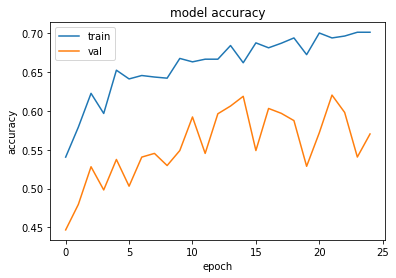

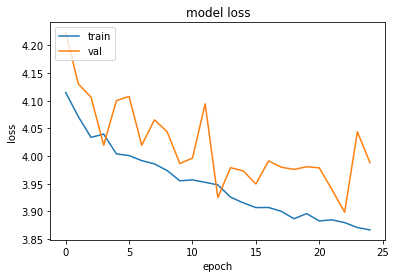

{'val_loss': [4.223781442642212, 4.130122232437134, 4.106440210342408, 4.019613485078554, 4.100281715393066, 4.107696866989135, 4.019555533254469, 4.065459966659546, 4.04400668144226, 3.9865049768138574, 3.996339702606201, 4.094457197189331, 3.9247950702100187, 3.9790749311447144, 3.973150038719177, 3.9495562250549727, 3.991263818740845, 3.9798548936843874, 3.975836658477783, 3.9806124229688904, 3.978684902191162, 3.939265561103821, 3.898460987451914, 4.04377007484436, 3.9879310607910154, 3.900493712038607, 3.9548255681991575, 3.95793879032135, 3.886420382035745, 4.039903163909912, 3.93902530670166, 3.9372599575970626, 3.930145025253296, 3.9792958736419677, 3.94533908367157, 3.873016669943526, 3.936471462249756, 3.9859979152679443, 3.897460592759622, 3.937735843658447, 3.934830665588379, 3.887967921592094, 3.9543692827224732, 3.9492923259735107, 3.8552647216899976, 3.9405309200286864, 3.9185694456100464, 3.856094002723694, 3.927318549156189, 3.93344042301178, 3.9627883434295654, 3.8567

In [87]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'][:25])
plt.plot(history.history['val_acc'][:25])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][:25])
plt.plot(history.history['val_loss'][:25])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print(history.history)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


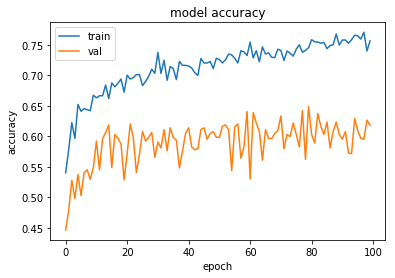

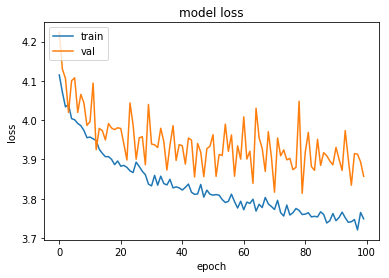

In [88]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Singular prediction

array([[0.27, 0.73]], dtype=float32)

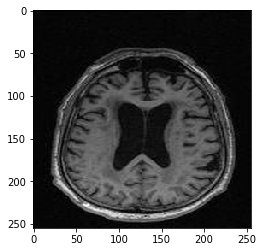

In [89]:
#Get image from to predict Post_Processada_2Cat dataset
img = Image.open('../data/Datasets/MPRAGE_2Cat/TestSet/AD/AD_51-frame000-slice119.jpg')
img = np.asarray(img.resize((255,255), Image.ANTIALIAS))/255
plt.imshow(img)
p = model_inception3.predict(np.array([img]))
p

array([[0.28, 0.72]], dtype=float32)

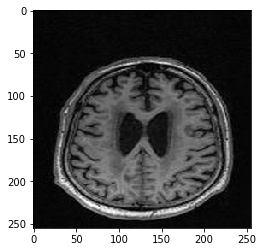

In [90]:
#Get image from to predict Post_Processada_2Cat dataset
img = Image.open('../data/Datasets/MPRAGE_2Cat/TestSet/AD/AD_51-frame000-slice127.jpg')
img = np.asarray(img.resize((255,255), Image.ANTIALIAS))/255
plt.imshow(img)
p = model_inception3.predict(np.array([img]))
p

## Multiple prediction

In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[19 16]
 [16 13]]
Normalized confusion matrix
[[0.54 0.46]
 [0.55 0.45]]


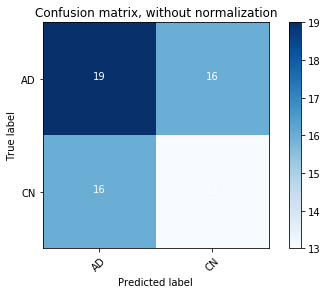

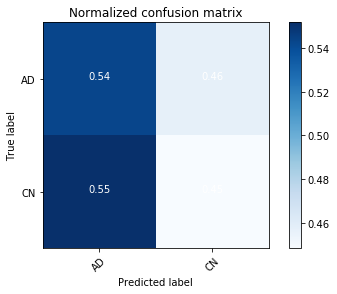

In [92]:
# Get images and corresponding label
images_test, y_labels = next(test_generator_MPRAGE_2Cat)
images_test = np.round(images_test)
# Get predictions
y_pred = model_inception3.predict_generator(test_generator_MPRAGE_2Cat, steps=1, verbose=0)
y_pred = np.round(y_pred).argmax(axis=1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_labels.argmax(axis=1), y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()